![title](static/wcar.png)

# Victor VSGs in *Trypanosoma brucei*

## set up notebook

In [1]:
#!rm genomes/tb927_6/*

In [1]:
#reload when modified
%load_ext autoreload
%autoreload 2
#activate r magic
%load_ext rpy2.ipython
%matplotlib inline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utilities as UT
import missingno as msno
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gc
from io import StringIO
from itertools import islice
from Bio import SeqIO

random.seed(1976)
np.random.seed(1976)

In [3]:
import multiprocessing
multiprocessing.cpu_count()

56

# Data Anaylsis
# using version 56 as it has full length vsgs

In [45]:
!mkdir -p InData/CD_Search/
!mkdir -p InData

!gtf2bed < genomes/tb927_56/tb927_56.gtf > tb927_56.bed

In [46]:
out = open('tb927_56_cds.bed','w')
for l in open('tb927_56.bed'):
    if l.split('\t')[7]=='CDS':
        out.write(l)
out.close()   

In [47]:

!bedtools nuc -fi genomes/tb927_56/tb927_56.fa -bed tb927_56_cds.bed > InData/GC_content_927.txt

#!cp genomes/tb927_3/tb927_3.gff .

!cp genomes/tb927_56/tb927_56.gtf .
!cp genomes/tb927_56/tb927_56.fa .
!cp genomes/tb927_56/tb927_56.fa.fai .

#!wget https://tritrypdb.org/common/downloads/Current_Release/TbruceiTREU927/gaf/TriTrypDB-50_TbruceiTREU927_GO.gaf -O InData/TriTrypDB-50_TbruceiTREU927_GO.gaf



## Experiment SetUp

In [8]:
from IPython.display import Image

In [9]:
#!less genomes/tb427/tb427.gff

In [10]:
'''
def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())

out = []
record_dict = {}
with open("InData/TriTrypDB-50_TbruceiLister427_2018_AnnotatedProteins.fasta") as handle:
    for index, record in enumerate(SeqIO.parse(handle, "fasta")):
        record_dict['seq_'+str(index)] = record.id
        record.id = 'seq_'+str(index)
        out.append(record)
        #break


!mkdir -p InData/CD_Search/
for index,ch in enumerate(chunk(out, 3000)):
    fname = 'InData/CD_Search/indata_CD_Search_427_'+str(index)
    fout = open(fname, 'w')
    for record in ch:
        SeqIO.write( record,fout,'fasta')
    fout.close()
'''    

'\ndef chunk(it, size):\n    it = iter(it)\n    return iter(lambda: tuple(islice(it, size)), ())\n\nout = []\nrecord_dict = {}\nwith open("InData/TriTrypDB-50_TbruceiLister427_2018_AnnotatedProteins.fasta") as handle:\n    for index, record in enumerate(SeqIO.parse(handle, "fasta")):\n        record_dict[\'seq_\'+str(index)] = record.id\n        record.id = \'seq_\'+str(index)\n        out.append(record)\n        #break\n\n\n!mkdir -p InData/CD_Search/\nfor index,ch in enumerate(chunk(out, 3000)):\n    fname = \'InData/CD_Search/indata_CD_Search_427_\'+str(index)\n    fout = open(fname, \'w\')\n    for record in ch:\n        SeqIO.write( record,fout,\'fasta\')\n    fout.close()\n'

In [11]:
!ls /cluster/majf_lab/mtinti/Calvin/ESAG3_RNAi/F21FTSEUHT2083_TRYeqlrR/clean/InData/CD_Search/

427_0_hitdata.txt  927_1_hitdata.txt	   indata_CD_Search_427_4
427_1_hitdata.txt  927_2_hitdata.txt	   indata_CD_Search_427_5
427_2_hitdata.txt  927_3_hitdata.txt	   indata_CD_Search_927_0
427_3_hitdata.txt  indata_CD_Search_427_0  indata_CD_Search_927_1
427_4_hitdata.txt  indata_CD_Search_427_1  indata_CD_Search_927_2
427_5_hitdata.txt  indata_CD_Search_427_2  indata_CD_Search_927_3
927_0_hitdata.txt  indata_CD_Search_427_3


In [12]:
#path = '/cluster/majf_lab/mtinti/Calvin/ESAG3_RNAi/F21FTSEUHT2083_TRYeqlrR/clean/InData/CD_Search/'

def get_fasta_desc(fasta_desc):
    res = {}
    for n in fasta_desc.split(" | "):
        if '=' in n:
            key = n.split('=')[0].strip()
            value = n.split('=')[1].strip()
            res[key]=value
    return res

# from io import StringIO
def read_csv(filename, comment='#', sep='\t', ):
    lines = "".join([line for line in open(filename) 
                     if not line.startswith(comment)])
    return pd.read_csv(StringIO(lines), sep=sep)

df_list = []
for f in ['InData/CD_Search/927_{}_hitdata.txt'.format(n) for n in range(0,4)]:
    temp = read_csv(f)
    temp['seq_id'] = [n.split(' ')[2][1:] for n in temp['Query']]
    temp['gene_id'] = [get_fasta_desc(n)['gene'] for n in temp['Query']]
    df_list.append(temp)
df_domains=pd.concat(df_list)
df_domains.tail()



,Query,Hit type,PSSM-ID,From,To,E-Value,Bitscore,Accession,Short name,Incomplete,Superfamily,seq_id,gene_id
2016,Q#2196 - >seq_11195 Tb11.1690:pseudogenic_tran...,non-specific,395732,88,403,2.926680e-04,43.1506,pfam00913,Trypan_glycop,-,-,seq_11195,Tb11.1690
2017,Q#2196 - >seq_11195 Tb11.1690:pseudogenic_tran...,superfamily,287612,475,514,8.069620e-03,36.2338,cl11264,Trypan_glycop_C superfamily,C,-,seq_11195,Tb11.1690
2018,Q#2197 - >seq_11196 Tb11.1700:pseudogenic_tran...,non-specific,395732,216,516,9.775360e-07,50.8546,pfam00913,Trypan_glycop,-,-,seq_11196,Tb11.1700
2019,Q#2202 - >seq_11201 Tb11.1800:pseudogenic_tran...,superfamily,302859,1,387,4.186380e-164,478.5540,cl19421,RHSP superfamily,C,-,seq_11201,Tb11.1800
2020,Q#2203 - >seq_11202 Tb11.1810.1-p1 | transcrip...,superfamily,302859,1,222,7.326060e-103,315.2300,cl19421,RHSP superfamily,N,-,seq_11202,Tb11.1810


In [13]:
domain_dict = {}
for temp_id in df_domains.gene_id.unique():
    temp = df_domains[df_domains['gene_id']==temp_id]
    domains = list(temp['Short name'].values) 
    domains = '; '.join(domains)
    domain_dict[temp_id]=domains
domain_dict[list(domain_dict.keys())[0]]

'VSG_B; Trypan_glycop_C'

In [14]:
#create a dictionary of gene to desc
#from the gff file
def make_desc(_GFF):
    gff =pd.read_csv( _GFF, sep='\t', header=None, comment='#')
    #print(gff)
    gff = gff[gff.iloc[:,2].str.contains('gene')]
    #print( gff[gff[gff.columns[-1]].str.contains('Tb427_020006200')] )
    #print(gff)
    desc = {}
    chr_dict = {}
    start_dict = {}
    sense_dict = {}
    for index,n in enumerate(gff.iloc[:,-1]):
        n=n.replace('%2C',' ')
        item_list = n.split(';')
        #print (item_list)
        temp_dict = {}
        for m in item_list:
            #print(m)
            temp_dict[m.split('=')[0].strip()]=m.split('=')[1].strip()
        #print(temp_dict['ID'])
        #print(temp_dict['description'])
        desc[temp_dict['ID']]=temp_dict.get('description','none')
        chr_dict[temp_dict['ID']]=gff.iloc[index][0]
        start_dict[temp_dict['ID']]=gff.iloc[index][3]
        sense_dict[temp_dict['ID']]=gff.iloc[index][6]
        
    return desc,chr_dict,start_dict,sense_dict

desc_dict_gff, _, _,_ = make_desc('InData/TriTrypDB-55_TbruceiTREU927.gff')

#(list(desc_dict.keys())[0],
# desc_dict[list(desc_dict.keys())[0]],
# chr_dict[list(desc_dict.keys())[0]],
# start_dict[list(desc_dict.keys())[0]],
#sense_dict[list(desc_dict.keys())[0]],
#)
#desc_dict_gff

In [15]:
#!cp genomes/tb427/tb427.gff .

In [16]:
#create a dictionary of gene to desc
#from the gff file
def make_desc(_GFF):
    gff =pd.read_csv( _GFF, sep='\t', header=None, comment='#')
    
    gff = gff[gff.iloc[:,2]=='exon']
    
    #print( gff[gff[gff.columns[-1]].str.contains('Tb427_020006200')] )
    desc = {}
    chr_dict = {}
    start_dict = {}
    sense_dict = {}
    for index,n in enumerate(gff.iloc[:,-1]):
        #print(n)
        n=n.replace('%2C',' ')
        item_list = n.split(';')
        item_list = [n for n in item_list if len(n)>0]
        temp_dict = {}
        
        for m in item_list:
            
            temp_dict[m.strip().split(' ')[0].strip().replace('\"','')
                     ]=m.strip().split(' ')[1].strip().replace('\"','')
        #print(temp_dict)
        #print(temp_dict['description'])
        desc[temp_dict['gene_id']]=temp_dict.get('description',temp_dict['gene_id'])
        chr_dict[temp_dict['gene_id']]=gff.iloc[index][0]
        start_dict[temp_dict['gene_id']]=gff.iloc[index][3]
        sense_dict[temp_dict['gene_id']]=gff.iloc[index][6]
        
    return desc,chr_dict,start_dict,sense_dict

desc_dict, chr_dict, start_dict,sense_dict = make_desc('genomes/tb927_56/tb927_56.gtf')
(list(desc_dict.keys())[0],
 desc_dict[list(desc_dict.keys())[0]],
 chr_dict[list(desc_dict.keys())[0]],
 start_dict[list(desc_dict.keys())[0]],
sense_dict[list(desc_dict.keys())[0]],
)

('gene_Tb427VSG-3039', 'gene_Tb427VSG-3039', 'Tb427VSG-3039', 1, '+')

In [17]:
desc_dict.update(desc_dict_gff)

In [18]:
desc_dict['gene-Tb427.BES40.1']

'gene-Tb427.BES40.1'

In [19]:
desc_dict['gene_Tb427VSG-3039']

'gene_Tb427VSG-3039'

In [20]:
replace_list = eval(open('vars_def_927_10').read())
list_df = [n['experiment'] for n in replace_list]
list_df

['A3-20',
 'A3-12',
 'A3-8',
 'A3-4',
 'A3-0',
 'A2-20',
 'A2-12',
 'A2-8',
 'A2-4',
 'A2-0',
 'A1-20',
 'A1-12',
 'A1-8',
 'A1-4',
 'A1-0']

In [21]:
#read all the rna-seq reads counts for each sampe
#exp = '{life_stage}{replica}'
#list_df = [exp.format(
#    life_stage=life_stage,
#    replica=replica) 
# for life_stage in ['C','T']
# for replica in ['1','2','3']]

#aggregate counts in one dataframe
list_df = [n+'/res2_927/'+n+'/counts.txt' for n in list_df]
list_df =[pd.read_csv(n,index_col=[0],comment='#',sep='\t') for n in list_df]
df = list_df[0].copy()
for temp_df in list_df[1:]:
    df = df.join(temp_df.iloc[:,-1])
df.head()
#temp_df = pd.read_csv('BSF/tb927_3_ks_counts_final.txt',index_col=[0],comment='#',sep='\t')

,Chr,Start,End,Strand,Length,/tmp/345724.1.all.q/A3-20/A3-20sorted.bam,/tmp/345725.1.all.q/A3-12/A3-12sorted.bam,/tmp/345726.1.all.q/A3-8/A3-8sorted.bam,/tmp/345727.1.all.q/A3-4/A3-4sorted.bam,/tmp/345728.1.all.q/A3-0/A3-0sorted.bam,/tmp/345729.1.all.q/A2-20/A2-20sorted.bam,/tmp/345730.1.all.q/A2-12/A2-12sorted.bam,/tmp/345731.1.all.q/A2-8/A2-8sorted.bam,/tmp/345732.1.all.q/A2-4/A2-4sorted.bam,/tmp/345733.1.all.q/A2-0/A2-0sorted.bam,/tmp/345734.1.all.q/A1-20/A1-20sorted.bam,/tmp/345735.1.all.q/A1-12/A1-12sorted.bam,/tmp/345736.1.all.q/A1-8/A1-8sorted.bam,/tmp/345737.1.all.q/A1-4/A1-4sorted.bam,/tmp/345739.1.all.q/A1-0/A1-0sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,
gene_Tb427VSG-3039,Tb427VSG-3039,1,1199,+,1199,17654,15437,16044,12611,24376,14417,15986,13800,12620,24089,21992,19008,17460,11516,22289
gene_Tb427VSG-23,Tb427VSG-23,1,1199,+,1199,7182,2706,2101,1215,1948,3466,2470,1569,1038,2001,7348,3430,2240,1102,1816
gene_Tb427VSG-649,Tb427VSG-649,1,1199,+,1199,8183,5802,3786,3362,4681,8279,5222,3754,3493,4692,8111,5231,4414,3128,4265
gene_Tb427VSG-22,Tb427VSG-22,1,1199,+,1199,18877,10857,9360,6867,10017,14328,11358,7733,6262,9934,19855,15453,11468,6854,9035
gene_Tb427VSG-1117,Tb427VSG-1117,1,1199,+,1199,0,0,0,0,17,0,0,3,0,20,0,0,0,0,25


In [22]:
data_col = df.columns[5:]
data_col

Index(['/tmp/345724.1.all.q/A3-20/A3-20sorted.bam',
       '/tmp/345725.1.all.q/A3-12/A3-12sorted.bam',
       '/tmp/345726.1.all.q/A3-8/A3-8sorted.bam',
       '/tmp/345727.1.all.q/A3-4/A3-4sorted.bam',
       '/tmp/345728.1.all.q/A3-0/A3-0sorted.bam',
       '/tmp/345729.1.all.q/A2-20/A2-20sorted.bam',
       '/tmp/345730.1.all.q/A2-12/A2-12sorted.bam',
       '/tmp/345731.1.all.q/A2-8/A2-8sorted.bam',
       '/tmp/345732.1.all.q/A2-4/A2-4sorted.bam',
       '/tmp/345733.1.all.q/A2-0/A2-0sorted.bam',
       '/tmp/345734.1.all.q/A1-20/A1-20sorted.bam',
       '/tmp/345735.1.all.q/A1-12/A1-12sorted.bam',
       '/tmp/345736.1.all.q/A1-8/A1-8sorted.bam',
       '/tmp/345737.1.all.q/A1-4/A1-4sorted.bam',
       '/tmp/345739.1.all.q/A1-0/A1-0sorted.bam'],
      dtype='object')

In [23]:
#rename columns for convenience
indata = df[data_col]
indata.columns = [n.split('/')[3] for  n in indata.columns]
indata.head()

,A3-20,A3-12,A3-8,A3-4,A3-0,A2-20,A2-12,A2-8,A2-4,A2-0,A1-20,A1-12,A1-8,A1-4,A1-0
Geneid,,,,,,,,,,,,,,,
gene_Tb427VSG-3039,17654,15437,16044,12611,24376,14417,15986,13800,12620,24089,21992,19008,17460,11516,22289
gene_Tb427VSG-23,7182,2706,2101,1215,1948,3466,2470,1569,1038,2001,7348,3430,2240,1102,1816
gene_Tb427VSG-649,8183,5802,3786,3362,4681,8279,5222,3754,3493,4692,8111,5231,4414,3128,4265
gene_Tb427VSG-22,18877,10857,9360,6867,10017,14328,11358,7733,6262,9934,19855,15453,11468,6854,9035
gene_Tb427VSG-1117,0,0,0,0,17,0,0,3,0,20,0,0,0,0,25


In [24]:
data_col = df.columns[5:]
data_col

Index(['/tmp/345724.1.all.q/A3-20/A3-20sorted.bam',
       '/tmp/345725.1.all.q/A3-12/A3-12sorted.bam',
       '/tmp/345726.1.all.q/A3-8/A3-8sorted.bam',
       '/tmp/345727.1.all.q/A3-4/A3-4sorted.bam',
       '/tmp/345728.1.all.q/A3-0/A3-0sorted.bam',
       '/tmp/345729.1.all.q/A2-20/A2-20sorted.bam',
       '/tmp/345730.1.all.q/A2-12/A2-12sorted.bam',
       '/tmp/345731.1.all.q/A2-8/A2-8sorted.bam',
       '/tmp/345732.1.all.q/A2-4/A2-4sorted.bam',
       '/tmp/345733.1.all.q/A2-0/A2-0sorted.bam',
       '/tmp/345734.1.all.q/A1-20/A1-20sorted.bam',
       '/tmp/345735.1.all.q/A1-12/A1-12sorted.bam',
       '/tmp/345736.1.all.q/A1-8/A1-8sorted.bam',
       '/tmp/345737.1.all.q/A1-4/A1-4sorted.bam',
       '/tmp/345739.1.all.q/A1-0/A1-0sorted.bam'],
      dtype='object')

In [25]:
print(indata.shape)
indata=indata.dropna()
print(indata.shape)
#indata.loc['KS17gene_1749a']
#indata['desc']=[desc_dict.get(n,'none') for n in indata.index.values]
#indata.to_csv('indata.csv')
#indata.head()
#indata.loc['mainVSG-427-2']

#indata = indata.replace(1,np.nan).dropna(axis=1, how='all')
#print(indata.shape)
#indata.describe()

(11359, 15)
(11359, 15)


## QC - Missing Data Viz

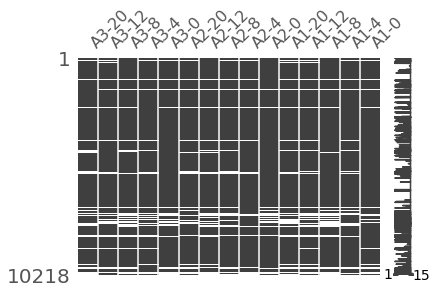

In [26]:
msno.matrix(indata.replace(0,np.nan).dropna(how='all'),figsize=(6, 4))

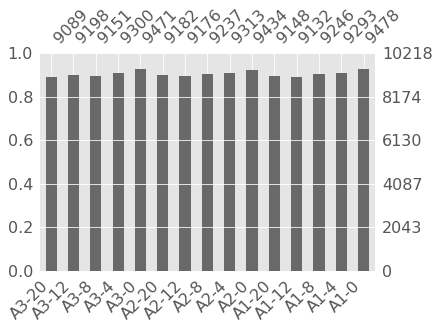

In [27]:
msno.bar(indata.replace(0,np.nan).dropna(how='all'),figsize=(6, 4))

## QC - Corr analysis

In [28]:
!mkdir -p Figures_927

(14.5, 0.5)


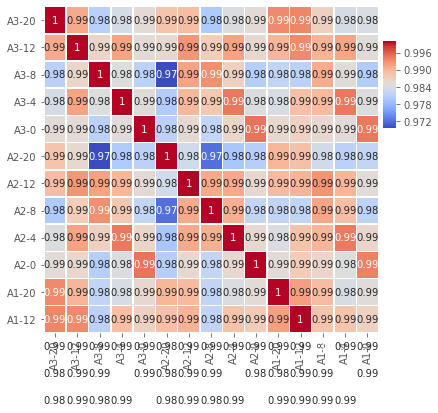

In [29]:
fig,ax=plt.subplots(figsize=(6,6))
cbar_ax = fig.add_axes([.91, .6, .03, .2])
sns.heatmap(np.log2(indata).corr(),
            #vmin=-1,
            cmap='coolwarm',
            annot=True,linewidths=.5,ax=ax, cbar_ax = cbar_ax, cbar=True)
print(ax.get_ylim())
ax.set_ylim(12,0)
plt.savefig('Figures_927/Figure_2.png')
plt.show()

## QC - MSD

{'r': '1', 'b': '2', 'y': '3'}


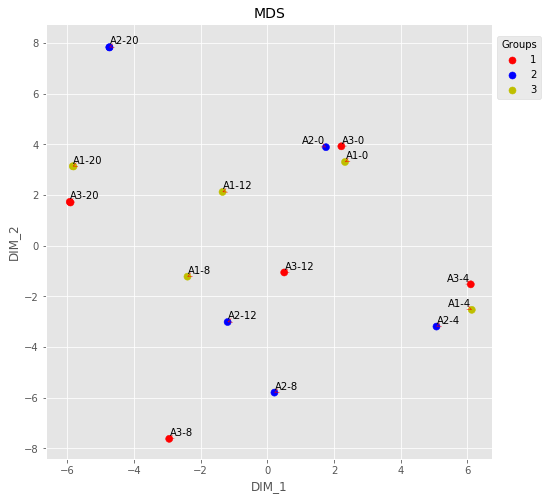

In [30]:
plt.style.use('ggplot')
palette = ['r']*5+['b']*5+['y']*5
fig,ax = plt.subplots(figsize=(8,8), ncols=1, nrows=1)
UT.make_mds(np.log2(indata),palette,ax,color_dictionary={'r':'1','b':'2','y':'3',
                                                        })
plt.savefig('Figures_927/Figure_3.png')
plt.show()

## Compute Length and GC content
this information is used to check for length and GC bias

In [31]:
!mkdir -p InData

In [32]:
#!cp genomes/tb927_56/tb927_56.gtf .
#!cp genomes/tb927_55/tb927_55.fa .
#!cp genomes/tb927_55/tb927_55.fa.fai .

#!gtf2bed < tb927_55.gtf > tb927_55.bed
#!bedtools nuc -fi tb927_55.fa -bed tb927_55.bed >InData/GC_content_927.txt

In [33]:
#!bowtie2-build genomes/tb927_5/tb927_5.fa genomes/tb927_5/tb927_5

In [34]:
def get_gene_ids(n):
    res = {}
    temp = n.split(';')
    temp =[n.strip() for n in temp if len(n)>2]
    temp = temp[:2]
    #print(temp)
    for f in temp:
        key = f.split(' ')[0]
        value = f.split(' ')[1]
        key=key.replace('\"','').replace('\'','').strip()
        value=value.replace('\"','').replace('\'','').strip()
        res[key]=value
    return res['gene_id']

In [35]:
gc_content = pd.read_csv('InData/GC_content_927.txt',sep='\t')
gc_content = gc_content[gc_content['8_usercol']=='CDS']
#print(gc_content)
gc_content['gene_id'] = [get_gene_ids(n) for n in gc_content['10_usercol']]
gc_content = gc_content.drop_duplicates('gene_id')
gc_content.set_index('gene_id',inplace=True)
gc_content=gc_content[['19_seq_len','12_pct_gc']]
gc_content.columns = ['length', 'gccontent']
gc_content.loc['gene-Tb427.BES40.14']

length       1893.000000
gccontent       0.436873
Name: gene-Tb427.BES40.14, dtype: float64

In [36]:
gc_content.head()

,length,gccontent
gene_id,,
Tb07.11L3.90,1131,0.510168
Tb07.11L3.100,3795,0.500132
Tb05.5K5.10,72,0.402778
Tb05.5K5.20,1278,0.461659
Tb05.5K5.30,1911,0.480900


In [37]:
metadata=pd.DataFrame()
metadata['samples']=indata.columns
metadata['treatment']=indata.columns
metadata['batch']=1
metadata.reset_index().to_csv('metadata.csv')

In [38]:
print(indata.shape)
indata=indata.join(gc_content,how='inner')
gc_content = gc_content[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True) 
indata.shape

(11359, 15)


(11359, 15)

### edgeR to filter low counts

In [39]:
%%R -i indata
options(warn=-1)
library("limma") 
library("edgeR")
head(indata)

                   A3.20 A3.12  A3.8  A3.4  A3.0 A2.20 A2.12  A2.8  A2.4  A2.0
gene_Tb427VSG-3039 17654 15437 16044 12611 24376 14417 15986 13800 12620 24089
gene_Tb427VSG-23    7182  2706  2101  1215  1948  3466  2470  1569  1038  2001
gene_Tb427VSG-649   8183  5802  3786  3362  4681  8279  5222  3754  3493  4692
gene_Tb427VSG-22   18877 10857  9360  6867 10017 14328 11358  7733  6262  9934
gene_Tb427VSG-1117     0     0     0     0    17     0     0     3     0    20
gene_Tb427VSG-1387   244   609   706  1143  2688   262   511   639  1052  2780
                   A1.20 A1.12  A1.8  A1.4  A1.0
gene_Tb427VSG-3039 21992 19008 17460 11516 22289
gene_Tb427VSG-23    7348  3430  2240  1102  1816
gene_Tb427VSG-649   8111  5231  4414  3128  4265
gene_Tb427VSG-22   19855 15453 11468  6854  9035
gene_Tb427VSG-1117     0     0     0     0    25
gene_Tb427VSG-1387   261   496   714   979  2396


In [60]:
#%%R -i indata
#options(warn=-1)
#library("limma") 
#library("edgeR")
#head(indata)

                   A3.20 A3.12  A3.8  A3.4  A3.0 A2.20 A2.12  A2.8  A2.4  A2.0
gene_Tb427VSG-3039 20998 18781 20233 14799 28993 17125 19862 17113 15204 28499
gene_Tb427VSG-23    9370  3619  2965  1570  2510  4526  3354  2100  1415  2594
gene_Tb427VSG-649   9845  6964  4977  3968  5739  9759  6540  4605  4156  5660
gene_Tb427VSG-22   21748 13198 11850  8157 12149 16273 13782  9421  7540 11881
gene_Tb427VSG-1117     0     0     1     2    26     0     0     4     0    23
gene_Tb427VSG-1387   295   754   938  1414  3276   333   633   818  1315  3335
                   A1.20 A1.12  A1.8  A1.4  A1.0
gene_Tb427VSG-3039 26112 22806 21189 14353 26212
gene_Tb427VSG-23    9670  4558  2957  1486  2361
gene_Tb427VSG-649   9805  6310  5460  3813  5074
gene_Tb427VSG-22   22992 18594 14182  8432 10894
gene_Tb427VSG-1117     0     0     0     1    34
gene_Tb427VSG-1387   316   591   873  1243  2969


In [40]:
%%R
group <- factor(c(
    'A20','A12','A8','A4','A2','A20','A12','A8','A4','A2','A20','A12','A8','A4','A2'
))

y <- DGEList(counts=indata,group=group)
keep <- filterByExpr(y,min.count = 10, min.total.count = 80)
y <- y[keep,,keep.lib.sizes=FALSE]
counts = y$counts
genes = row.names(y)

In [41]:
%R -o counts,genes
indata = pd.DataFrame(counts,index=genes,columns=indata.columns)
indata.shape

(8541, 15)

In [42]:
indata=indata.join(gc_content,how='inner')
indata.shape

(8541, 17)

### GC / length content

In [43]:
gc_content = indata[['length', 'gccontent']]
indata.drop(['length', 'gccontent'],axis=1,inplace=True)
print(indata.shape,gc_content.shape)
indata.head()

(8541, 15) (8541, 2)


,A3-20,A3-12,A3-8,A3-4,A3-0,A2-20,A2-12,A2-8,A2-4,A2-0,A1-20,A1-12,A1-8,A1-4,A1-0
gene_Tb427VSG-3039,17654,15437,16044,12611,24376,14417,15986,13800,12620,24089,21992,19008,17460,11516,22289
gene_Tb427VSG-23,7182,2706,2101,1215,1948,3466,2470,1569,1038,2001,7348,3430,2240,1102,1816
gene_Tb427VSG-649,8183,5802,3786,3362,4681,8279,5222,3754,3493,4692,8111,5231,4414,3128,4265
gene_Tb427VSG-22,18877,10857,9360,6867,10017,14328,11358,7733,6262,9934,19855,15453,11468,6854,9035
gene_Tb427VSG-1387,244,609,706,1143,2688,262,511,639,1052,2780,261,496,714,979,2396


### size factors

In [44]:
sizeFactors=indata.sum()
sizeFactors = sizeFactors.values
sizeFactors

array([26274538, 26146442, 24949560, 27078121, 26008877, 25771354,
       25766751, 25455290, 26462758, 25990909, 26181028, 27262737,
       26731458, 26297696, 25033376])

In [66]:
#np.log2(gc_content['length']/1000).plot(kind='hist')

### Bias Correction

In [68]:
%%R -i gc_content,indata,sizeFactors
library(cqn)
library(scales)

In [69]:
%%R
stopifnot(all(rownames(indata) == rownames(gc_content)))
cqn.subset <- cqn(indata, lengths = gc_content$length,
                  x = gc_content$gccontent, sizeFactors = sizeFactors,
                  verbose = TRUE)

RQ fit ...............
SQN .


In [70]:
#%R cqn.subset

### Viz Bias

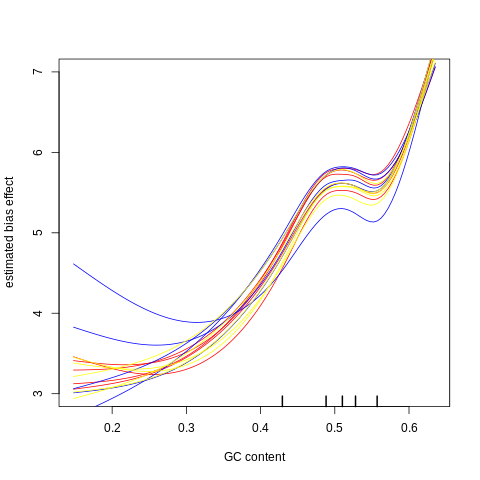

In [72]:
%%R
cqnplot <- function(x, n = 1, col = "grey60", ylab="estimated bias effect", 
                    xlab = "", type = "l", lty = 1, ...) {
    if(class(x) != "cqn")
        stop("'x' needs to be of class 'cqn'")
    if(n == 1) {
        func <- x$func1
        grid <- x$grid1
        knots <- x$knots1
    }
    if(n == 2) {
        if(is.null(x$func2))
            stop("argument 'x' does not appear to have two smooth functions (component 'func2' is NULL)")
        func <- x$func2
        grid <- x$grid2
        knots <- x$knots2
    }
    
    
    #par(mar=c(5.1, 4.1, 4.1, 8.1), xpd=TRUE)
    matplot(replicate(ncol(func), grid), func, ylab = ylab, xlab = xlab, type = type,
            col = col, lty = lty, ...)
    
    legend("bottomleft", legend = colnames(x$counts), inset=c(1,0),
           title="Samples", lty = lty, col = col)
    rug(knots, lwd = 2)
    invisible(x)
    
}


library(repr)
#options(repr.plot.width = 10, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=4, repr.plot.height=3)


colors <- c(
    'red','red','red','red','red',
    'blue','blue','blue','blue','blue',
'yellow','yellow','yellow','yellow','yellow'
    
)
lty =c(1,1,1,1,1,
       1,1,1,1,1,
       1,1,1,1,1
      )

#png("Figures/Figure_12.png")
#par(mfrow=c(1,2))
cqnplot(cqn.subset, col=colors,
        n = 1, xlab = "GC content", lty = lty,
        ylim = c(3, 7), 
        
       )
#dev.off()

#ggsave('plot.png', width=8.27, height= 11.69) #A4 size in inches
#dev.off()

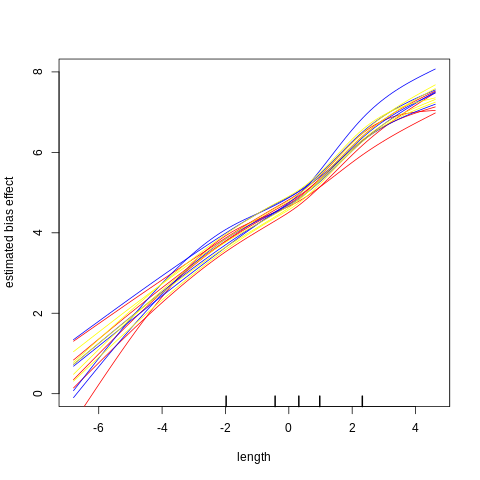

In [74]:
%%R
library(repr)
#options(repr.plot.width = 12, repr.plot.height = 0.75)
# Change plot size to 4 x 3
#options(repr.plot.width=8, repr.plot.height=3)


colors <- c(
    'red','red','red','red','red',
    'blue','blue','blue','blue','blue',
'yellow','yellow','yellow','yellow','yellow'
    
)
lty =c(1,1,1,1,1,
       1,1,1,1,1,
       1,1,1,1,1
      )

#par(mfrow=c(1,2))
#png("Figures/Figure_13.png")
cqnplot(cqn.subset, col=colors,
        n = 2, xlab = "length", lty = lty,
        ylim = c(0,8), 
    
       )
#dev.off()

### Bias Correction

In [75]:
%%R
RPKM.cqn <- cqn.subset$y + cqn.subset$offset
out_table <- RPKM.cqn
head(out_table)

                       A3.20     A3.12      A3.8      A3.4       A3.0     A2.20
gene_Tb427VSG-3039 10.061945 10.034759 10.034759  9.697002 10.6203025  9.840913
gene_Tb427VSG-23    8.920700  7.428969  7.279495  6.079272  6.9658889  7.860944
gene_Tb427VSG-649   9.109395  8.619207  8.127713  7.570534  8.2387236  9.124384
gene_Tb427VSG-22   10.133577  9.569866  9.357921  8.883438  9.3982117  9.766521
gene_Tb427VSG-1117 -4.689750 -4.981444 -3.698613 -2.934580 -0.9941504 -4.383959
gene_Tb427VSG-1387  4.284355  5.401006  5.963067  6.245243  7.6550993  4.425378
                       A2.12      A2.8      A2.4       A2.0     A1.20     A1.12
gene_Tb427VSG-3039 10.034759  9.835420  9.721320 10.5688465 10.464011 10.126159
gene_Tb427VSG-23    7.434548  6.636212  5.994316  7.0092661  8.960065  7.800246
gene_Tb427VSG-649   8.545517  7.944652  7.721669  8.2158151  9.100481  8.420092
gene_Tb427VSG-22    9.582825  9.121373  8.822450  9.3834098 10.195198  9.915161
gene_Tb427VSG-1117 -5.075556 -2.320390 -

In [76]:
#out_table

In [77]:
%R -o out_table
out_table = pd.DataFrame(out_table,index=indata.index.values,columns=indata.columns)
out_table.head()

,A3-20,A3-12,A3-8,A3-4,A3-0,A2-20,A2-12,A2-8,A2-4,A2-0,A1-20,A1-12,A1-8,A1-4,A1-0
gene_Tb427VSG-3039,10.061945,10.034759,10.034759,9.697002,10.620302,9.840913,10.034759,9.835420,9.721320,10.568847,10.464011,10.126159,10.061945,9.673213,10.544331
gene_Tb427VSG-23,8.920700,7.428969,7.279495,6.079272,6.965889,7.860944,7.434548,6.636212,5.994316,7.009266,8.960065,7.800246,7.190263,6.075027,6.935156
gene_Tb427VSG-649,9.109395,8.619207,8.127713,7.570534,8.238724,9.124384,8.545517,7.944652,7.721669,8.215815,9.100481,8.420092,8.162603,7.580968,8.112131
gene_Tb427VSG-22,10.133577,9.569866,9.357921,8.883438,9.398212,9.766521,9.582825,9.121373,8.822450,9.383410,10.195198,9.915161,9.523548,8.981556,9.308432
gene_Tb427VSG-1117,-4.689750,-4.981444,-3.698613,-2.934580,-0.994150,-4.383959,-5.075556,-2.320390,-4.299304,-0.886756,-5.054918,-4.708805,-4.692789,-3.763922,-0.561155


### Visualise Normalized Counts

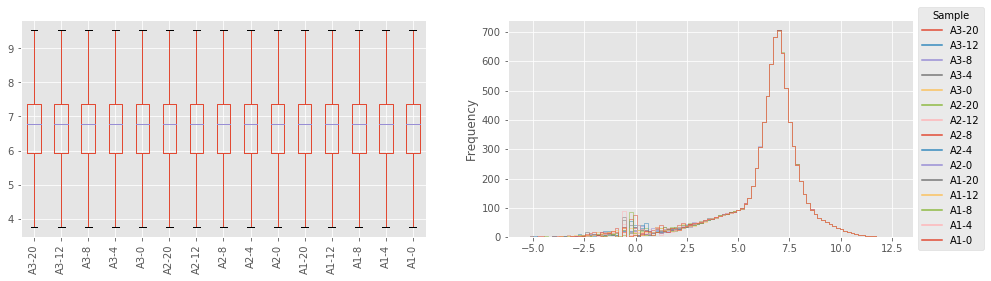

(8510, 15)


In [78]:
fig,axes=plt.subplots(figsize=(16,4),ncols=2)
ax = axes[0]
out_table.plot(kind='box',ax=ax,rot=90,showfliers=False)

ax = axes[1]
out_table.replace(-np.inf,-1.5).plot(kind='hist',
                                            histtype='step',
                                            bins=100,ax=ax)
UT.hist_legend(ax,'Sample')
#ax.set_xticklabels(out_df.columns, rotation=90, )
plt.show()
print(out_table.shape)

In [86]:
!jupyter nbconvert --to html_toc --output-dir save_notebook FiguresPaper-927-unique_10.ipynb 

[NbConvertApp] Converting notebook FiguresPaper-927-unique_10.ipynb to html_toc
[NbConvertApp] Support files will be in FiguresPaper-927-unique_10_files/
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPaper-927-unique_10_files
[NbConvertApp] Making directory save_notebook/FiguresPap